# Step 1: Install and Import Libraries

In [145]:
# Get time series data
#import yfinance as yf

# Prophet model for time series forecast
from prophet import Prophet

# Data processing
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Model performance evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Step 2: Pull Data

In [146]:
import json

In [147]:
f = open("boutique_training.json")
prom = json.load(f)
df_train = pd.DataFrame( prom['data']['result'][0]['values'] )
df_train.columns = ['ds', 'y']
df_train

,ds,y
0,1701202815,8.12169312169312
1,1701202830,7.657657657657658
2,1701202845,8.030303030303031
3,1701202860,3.1
4,1701202875,3
...,...,...
235,1701206340,3.123076923076923
236,1701206355,3.1290322580645165
237,1701206370,3.15625
238,1701206385,3.3008849557522124


In [148]:
f = open("boutique_training.json")
prom = json.load(f)
df_test = pd.DataFrame( prom['data']['result'][0]['values'] )
df_test.columns = ['ds', 'y']
df_test.head()
    

,ds,y
0,1701202815,8.12169312169312
1,1701202830,7.657657657657658
2,1701202845,8.030303030303031
3,1701202860,3.1
4,1701202875,3


In [149]:
#align test timestamps with training by time shifting back to the first train time...assume test data starts from 0 cycle time like training data

train_start_ds = df_train['ds'].iloc[0]
print(train_start_ds)

test_start_ds = df_test['ds'].iloc[0]
print(test_start_ds)

test_delta = test_start_ds - train_start_ds
print(test_delta)

1701202815
1701202815
0


In [150]:
df_test['ds'] = df_test['ds'] - test_delta

In [151]:
from datetime import datetime

In [152]:
df_train['ds'] = df_train['ds'].apply(lambda sec: datetime.fromtimestamp(sec))
df_train

,ds,y
0,2023-11-28 22:20:15,8.12169312169312
1,2023-11-28 22:20:30,7.657657657657658
2,2023-11-28 22:20:45,8.030303030303031
3,2023-11-28 22:21:00,3.1
4,2023-11-28 22:21:15,3
...,...,...
235,2023-11-28 23:19:00,3.123076923076923
236,2023-11-28 23:19:15,3.1290322580645165
237,2023-11-28 23:19:30,3.15625
238,2023-11-28 23:19:45,3.3008849557522124


In [153]:
df_test['ds'] = df_test['ds'].apply(lambda sec: datetime.fromtimestamp(sec))
df_test

,ds,y
0,2023-11-28 22:20:15,8.12169312169312
1,2023-11-28 22:20:30,7.657657657657658
2,2023-11-28 22:20:45,8.030303030303031
3,2023-11-28 22:21:00,3.1
4,2023-11-28 22:21:15,3
...,...,...
235,2023-11-28 23:19:00,3.123076923076923
236,2023-11-28 23:19:15,3.1290322580645165
237,2023-11-28 23:19:30,3.15625
238,2023-11-28 23:19:45,3.3008849557522124


In [154]:
# Information on the dataframe
df_train['y']=df_train['y'].astype(float)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      240 non-null    datetime64[ns]
 1   y       240 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [155]:
# Information on the dataframe
df_test['y']=df_test['y'].astype(float)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      240 non-null    datetime64[ns]
 1   y       240 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


Next, let's visualize the closing prices of the two tickers using `seaborn`, and add the legend to the plot using `matplotlib`. We can see that the price for Google increased a lot starting in late 2020, and almost doubled in late 2021.

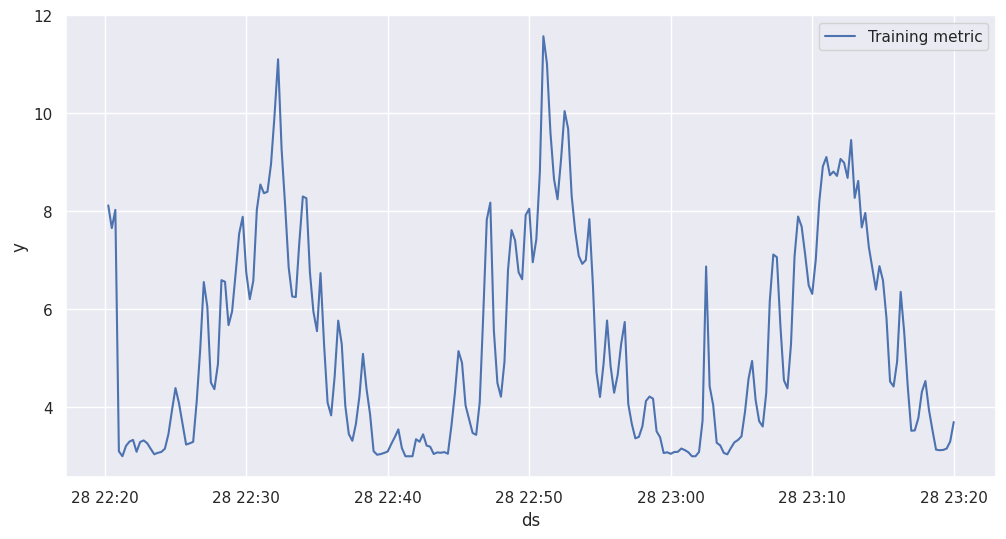

In [170]:
# Visualize data using seaborn
sns.set(rc={'figure.figsize':(12,6)})
sns.lineplot(x=df_train['ds'], y=df_train['y'])
plt.legend(['Training metric'])

# Step 3: Build Time Series Model Using Prophet in Python

In [157]:
# Add seasonality
model = Prophet(interval_width=0.99, yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False, growth='flat')
model.add_seasonality(name='hourly', period=1/24, fourier_order=5)

# Fit the model on the training dataset
model.fit(df_train)

23:20:22 - cmdstanpy - INFO - Chain [1] start processing
23:20:22 - cmdstanpy - INFO - Chain [1] done processing


# Step 4: Make Predictions Using Prophet in Python

After building the model, in step 4, we use the model to make predictions on the dataset. The forecast plot shows that the predictions are in general aligned with the actual values.

/home/ekarangw/.local/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/ekarangw/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


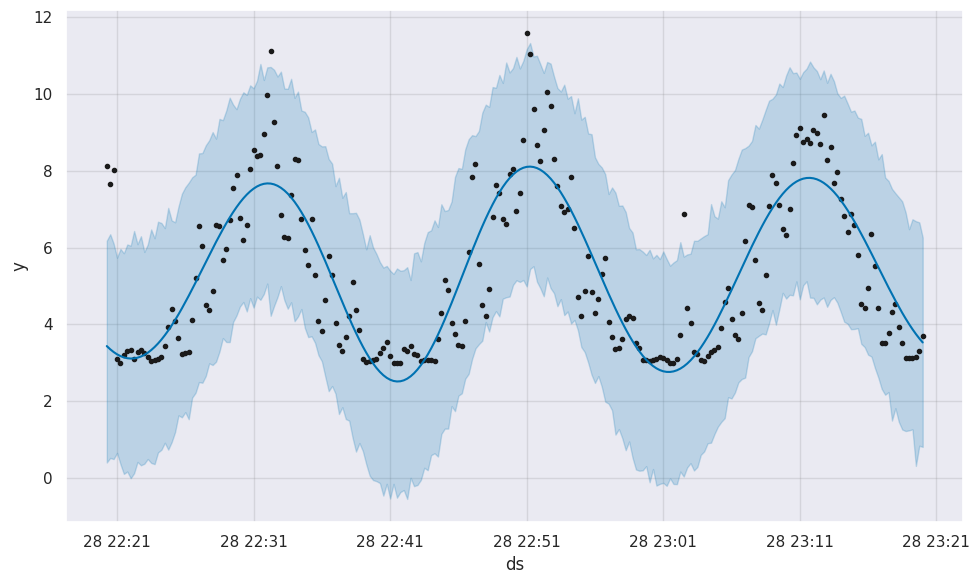

In [158]:
# Make prediction
forecast = model.predict(df_test)

# Visualize the forecast
model.plot(forecast); # Add semi-colon to remove the duplicated chart

We can also check the components plot for the trend, weekly seasonality, and yearly seasonality.

/home/ekarangw/.local/lib/python3.10/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/ekarangw/.local/lib/python3.10/site-packages/prophet/plot.py:395: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/home/ekarangw/.local/lib/python3.10/site-packages/prophet/plot.py:399: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

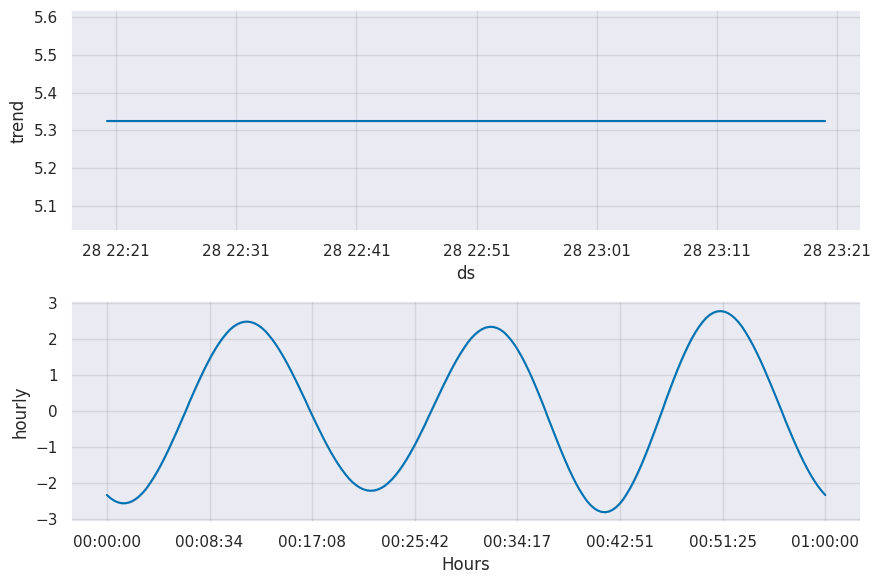

In [159]:
# Visualize the forecast components
model.plot_components(forecast);

# Step 5: Check Time Series Model Performace

In [160]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,hourly,hourly_lower,hourly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-11-28 22:20:15,5.326035,0.406692,6.179238,5.326035,5.326035,-1.890019,-1.890019,-1.890019,-1.890019,-1.890019,-1.890019,0.0,0.0,0.0,3.436016
1,2023-11-28 22:20:30,5.326035,0.525654,6.346183,5.326035,5.326035,-1.973078,-1.973078,-1.973078,-1.973078,-1.973078,-1.973078,0.0,0.0,0.0,3.352957
2,2023-11-28 22:20:45,5.326035,0.496036,6.104085,5.326035,5.326035,-2.044409,-2.044409,-2.044409,-2.044409,-2.044409,-2.044409,0.0,0.0,0.0,3.281626
3,2023-11-28 22:21:00,5.326035,0.655422,5.738015,5.326035,5.326035,-2.103642,-2.103642,-2.103642,-2.103642,-2.103642,-2.103642,0.0,0.0,0.0,3.222393
4,2023-11-28 22:21:15,5.326035,0.364647,5.964342,5.326035,5.326035,-2.150466,-2.150466,-2.150466,-2.150466,-2.150466,-2.150466,0.0,0.0,0.0,3.175569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2023-11-28 23:19:00,5.326035,1.242183,6.477955,5.326035,5.326035,-1.316093,-1.316093,-1.316093,-1.316093,-1.316093,-1.316093,0.0,0.0,0.0,4.009942
236,2023-11-28 23:19:15,5.326035,1.268417,6.736189,5.326035,5.326035,-1.450097,-1.450097,-1.450097,-1.450097,-1.450097,-1.450097,0.0,0.0,0.0,3.875938
237,2023-11-28 23:19:30,5.326035,0.317486,6.685875,5.326035,5.326035,-1.575126,-1.575126,-1.575126,-1.575126,-1.575126,-1.575126,0.0,0.0,0.0,3.750909
238,2023-11-28 23:19:45,5.326035,0.843911,6.655156,5.326035,5.326035,-1.690520,-1.690520,-1.690520,-1.690520,-1.690520,-1.690520,0.0,0.0,0.0,3.635515


In [161]:
# Merge actual and predicted values
performance = pd.merge(df_test, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

In [162]:
performance

,ds,y,yhat,yhat_lower,yhat_upper
0,2023-11-28 22:20:15,8.121693,3.436016,0.406692,6.179238
1,2023-11-28 22:20:30,7.657658,3.352957,0.525654,6.346183
2,2023-11-28 22:20:45,8.030303,3.281626,0.496036,6.104085
3,2023-11-28 22:21:00,3.100000,3.222393,0.655422,5.738015
4,2023-11-28 22:21:15,3.000000,3.175569,0.364647,5.964342
...,...,...,...,...,...
235,2023-11-28 23:19:00,3.123077,4.009942,1.242183,6.477955
236,2023-11-28 23:19:15,3.129032,3.875938,1.268417,6.736189
237,2023-11-28 23:19:30,3.156250,3.750909,0.317486,6.685875
238,2023-11-28 23:19:45,3.300885,3.635515,0.843911,6.655156


In [163]:
# Check MAE value
performance_MAE = mean_absolute_error(performance['y'], performance['yhat'])
print(f'The MAE for the model is {performance_MAE}')

# Check MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'The MAPE for the model is {performance_MAPE}')

The MAE for the model is 0.8211415619540432
The MAPE for the model is 0.15934371394404498


# Step 6: Identify Anomalies

In step 6, we will identify the time series anomalies by checking if the actual value is outside of the uncertainty interval. If the actual value is smaller than the lower bound or larger than the upper bound of the uncertainty interval, the anomaly indicator is set to 1, otherwise, it's set to 0.

Using `value_counts()`, we can see that there are 6 outliers out of 505 data points.

In [164]:
# Create an anomaly indicator
performance['anomaly'] = performance.apply(lambda rows: 1 if ((float(rows.y)<rows.yhat_lower)|(float(rows.y)>rows.yhat_upper)) else 0, axis = 1)


In [165]:
performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          240 non-null    datetime64[ns]
 1   y           240 non-null    float64       
 2   yhat        240 non-null    float64       
 3   yhat_lower  240 non-null    float64       
 4   yhat_upper  240 non-null    float64       
 5   anomaly     240 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.4 KB


In [166]:
# Check the number of anomalies
performance['anomaly'].value_counts()

anomaly
0    234
1      6
Name: count, dtype: int64

After printing out the anomalies, we can see that all the outliers are lower than the lower bound of the uncertainty interval.

In [167]:
# Take a look at the anomalies
anomalies = performance[performance['anomaly']==1].sort_values(by='ds')
anomalies

,ds,y,yhat,yhat_lower,yhat_upper,anomaly
0,2023-11-28 22:20:15,8.121693,3.436016,0.406692,6.179238,1
1,2023-11-28 22:20:30,7.657658,3.352957,0.525654,6.346183,1
2,2023-11-28 22:20:45,8.030303,3.281626,0.496036,6.104085,1
48,2023-11-28 22:32:15,11.105263,7.664636,4.223605,10.699577,1
123,2023-11-28 22:51:00,11.575342,8.099518,4.988858,11.159094,1
169,2023-11-28 23:02:30,6.875000,2.907264,0.041670,5.764591,1


In the visualization, all the dots are actual values and the black line represents the predicted values. The orange dots are the outliers.

<Axes: xlabel='ds', ylabel='y'>

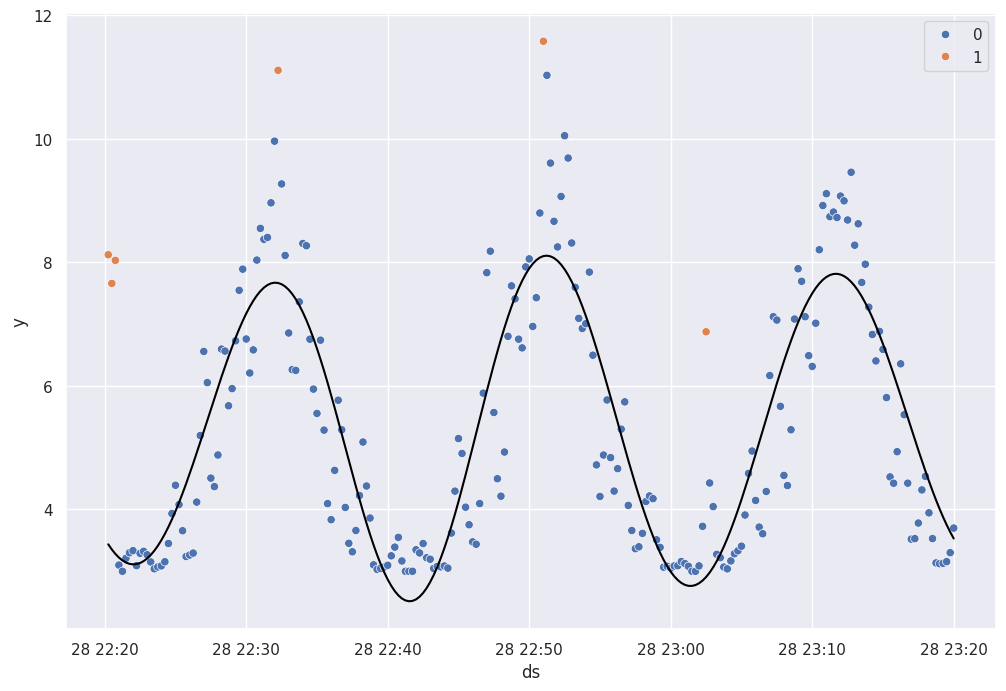

In [168]:
# Visualize the anomalies
sns.scatterplot(x='ds', y='y', data=performance, hue='anomaly')
sns.lineplot(x='ds', y='yhat', data=performance, color='black')